[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53

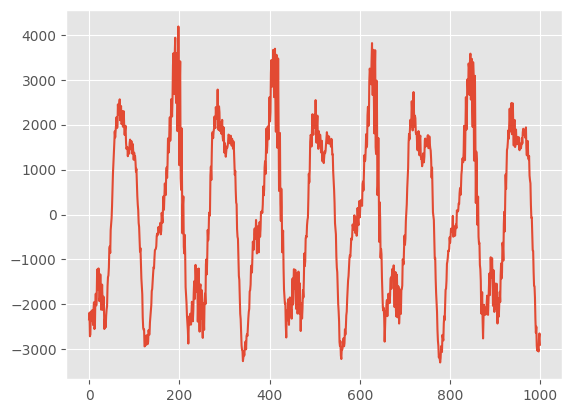

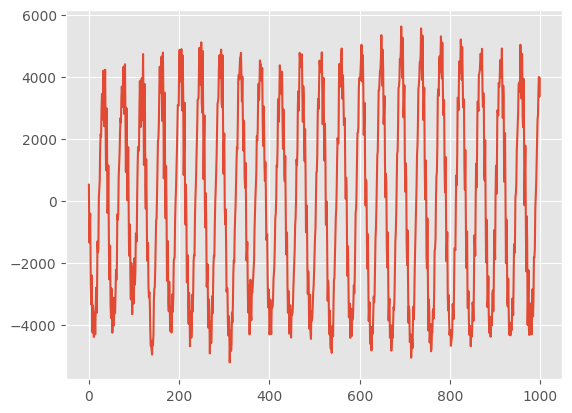

In [7]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.io.wavfile as spwav
#from mpldatacursor import datacursor
import sys
from scipy.io.wavfile import read, write

plt.style.use('ggplot')

# Note: this epoch list only holds for "test_vector_all_voiced.wav"
epoch_marks_orig = np.load("test_vector_all_voiced_epochs.npy")
F_s, audio_data = spwav.read("test_vector_all_voiced.wav")
N = len(audio_data) # 170268

######################## YOUR CODE HERE ##############################
F_new = 1000
# new_epoch_spacing = P_1
P_1 = F_s//F_new

audio_out = np.zeros(N)

# Suggested loop
for i in range(0, N, P_1):
    # https://courses.engr.illinois.edu/ece420/lab5/lab/#overlap-add-algorithm
    # Your OLA code here

    # Find closest epoch of current new epoch from (original) audio_data
    closest_epoch_index = np.argmin(abs(epoch_marks_orig - i)) # this index is index in epoch_marks_orig array

    # Find P_0, check two boundary conditions
    if closest_epoch_index == 0:
        P_0 = (epoch_marks_orig[closest_epoch_index + 1] - epoch_marks_orig[closest_epoch_index])
    elif closest_epoch_index == len(epoch_marks_orig)-1:
        P_0 = (epoch_marks_orig[len(epoch_marks_orig)-1] - epoch_marks_orig[len(epoch_marks_orig)-2])
    else:
        P_0 = (epoch_marks_orig[closest_epoch_index + 1] - epoch_marks_orig[closest_epoch_index - 1]) // 2

    # Hamming window, with the size of 2*P_0+1
    window_N = 2 * P_0 + 1
    linspace = np.linspace(0,window_N-1,window_N)
    Hamming_window = 0.54 - 0.46 * np.cos((2*np.pi*linspace)/(window_N-1))

    # Compute impulse response, check two boundary conditions
    if i - P_0 >= 0 and epoch_marks_orig[closest_epoch_index] - P_0 >= 0 and i+P_0+1 < len(audio_out) and epoch_marks_orig[closest_epoch_index]+P_0+1 < len(audio_data):
        windowed_response = audio_data[epoch_marks_orig[closest_epoch_index]-P_0 : epoch_marks_orig[closest_epoch_index]+P_0+1] * Hamming_window
        audio_out[i-P_0 : i+P_0+1] = audio_out[i-P_0 : i+P_0+1] + windowed_response

plt.figure()
plt.plot(np.linspace(0,1000-1,1000), audio_data[10000:11000])

plt.figure()
plt.plot(np.linspace(0,1000-1,1000), audio_out[10000:11000])


In [8]:
from IPython.display import Audio
# Audio(audio_data, rate=F_s)
Audio(audio_out, rate=F_s)